# Advection Equation LAX WENDROFF

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

We will use Leapfrog (Periodic boundary conditions in np.roll)

In [5]:
import numpy as np

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101   #changing nx the resolution change 
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step we will come back to this 
t_final = 20.0 

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt) #how many iteration


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

eps=[]
eps.append(0.0) #at the beginning analytic and numeric solution are equal

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [6]:
import matplotlib.pyplot as plt
import os
##create directory where to save images

os.makedirs('./Lax_Wendroff', exist_ok=True)

os.listdir('./');

In [7]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./Lax_Wendroff/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final: 
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + 0.5*(a*dt/dx)**2*(np.roll(u_current, -1)+ np.roll(u_current, 1)- 2*u_current) 
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

    diff= u_current - analytic_solution(t,x)
    eps.append(np.sqrt(np.sum(diff**2)/len(diff)))
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(-0.2,1.1)
        plt.savefig('./Lax_Wendroff/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()
    
# np.save('./Lax_Wendroff/l2norm'+str(cf)+'.npy', np.array(l2norm)) 
# np.save('./Lax_Wendroff/time'+str(cf)+'.npy', np.array(time))
np.save('./Lax_Wendroff/u_20'+str(nx)+'.npy', np.array(u_current))
np.save('./Lax_Wendroff/x'+str(nx)+'.npy', np.array(x))


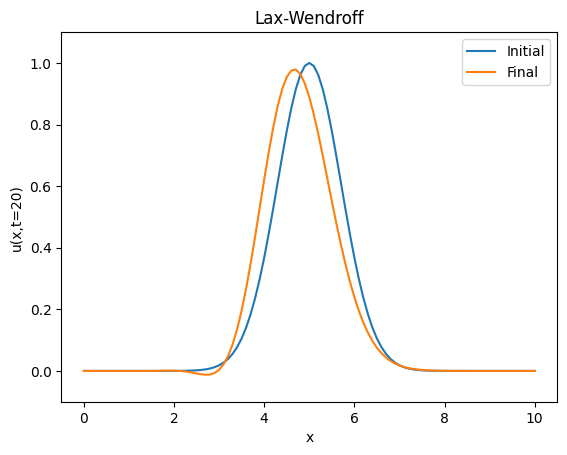

In [8]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Lax-Wendroff')
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u(x,t=20)')
plt.savefig('./Lax_Wendroff/final'+str(cf)+'.png', dpi=200)
plt.legend()
plt.show()

### L2 norm

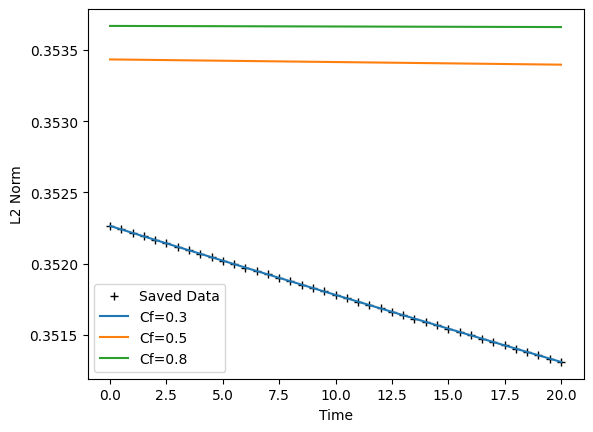

In [9]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_LAXWENDROFF.dat', comments='#')
norm1=np.load('./Lax_Wendroff/l2norm101.npy')
time1=np.load('./Lax_Wendroff/time101.npy')
norm2=np.load('./Lax_Wendroff/l2norm301.npy')
time2=np.load('./Lax_Wendroff/time301.npy')
norm3=np.load('./Lax_Wendroff/l2norm501.npy')
time3=np.load('./Lax_Wendroff/time501.npy')

# norm1=np.load('./Lax_Wendroff/l2norm0.3.npy')
# time1=np.load('./Lax_Wendroff/time0.3.npy')
# norm2=np.load('./Lax_Wendroff/l2norm0.5.npy')
# time2=np.load('./Lax_Wendroff/time0.5.npy')
# norm3=np.load('./Lax_Wendroff/l2norm0.8.npy')
# time3=np.load('./Lax_Wendroff/time0.8.npy')

plt.plot(l2_saved[:,0], l2_saved[:,1], '+', color='black', label='Saved Data')
plt.plot(time1,norm1, label='Cf=0.3')
plt.plot(time2,norm2, label='Cf=0.5')
plt.plot(time3,norm3, label='Cf=0.8')

# plt.plot(time1,norm1, label='J=101')
# plt.plot(time2,norm2, label='J=301')
# plt.plot(time3,norm3, label='J=501')
plt.xlabel('Time')
plt.ylabel('L2 Norm')
plt.legend()

plt.savefig('./Lax_Wendroff/ERR'+str(cf)+'.png', dpi=200)
plt.show()